_____________________________________________________________________________________________________________________________________________________________
## __ATLIQO BANK PROJECT- CREDIT CARD LAUNCH STRATEGY__
_____________________________________________________________________________________________________________________________________________________________

### __Problem Statement__

Atliqo Bank, a new entrant in the Indian banking sector, aims to launch a competitive credit card in a market with stiff competition. The bank lacks primary customer data and needs to analyze secondary data to identify the right target audience, spending patterns, and optimal credit card offers that customers cannot refuse.

The key challenge is to:

- Identify the most profitable customer segments.

- Understand spending behaviors and payment preferences.

- Design a compelling credit card offer based on data-driven insights.

- Validate the offer’s effectiveness through a controlled trial before a full-scale launch.

### __Project Objectives__

Target Market Identification

- Analyze customer demographics (age, income, occupation, location).

- Study spending patterns (transaction amounts, product categories, payment methods).

- Assess credit profiles (credit score, utilization, outstanding debt).

Offer Design & Testing

- Develop an attractive credit card offer based on insights.

- Conduct a controlled A/B test (test vs. control group) to measure offer effectiveness.

- Use statistical methods (hypothesis testing) to validate results.

Competitive Differentiation

- Benchmark against industry trends.

- Ensure the offer stands out in terms of rewards, cashback, or interest rates.



### __Project Phases__

### Phase 1:Target Market Analysis: Identify the most promising customer segments for the credit card launch

- Demographic Segmentation
- Spending Behavior Analysis
- Credit Profile Assessment

Expected Output:

- A well-defined target audience (e.g., "Urban professionals aged 25-40 with annual income > ₹5L").

- Insights into what credit card features (rewards, discounts) would appeal to them.

### Phase 2: Trial Run & Statistical Validation: Test the credit card offer on a small group before full-scale launch

- A/B Testing Setup
- Hypothesis Testing
- Performance Metrics

Expected Output:

- Statistical proof that the offer drives higher spending.

- Refined offer terms based on trial results.

### __Data Collection & Description__

Data Sources
- Secondary Data Provider: data.lelo (anonymized customer data).
- Data Formats: CSV files & SQL database.

Datasets Overview
- Customers Table: cust_id, name, gender, age, location, occupation, annual_income, marital_status
- Transactions Table: tran_id, cust_id, tran_date, tran_amount, platform, product_category, payment_type
- Credit Profiles Table: cust_id, credit_score, credit_utilisation, outstanding_debt, credit_inquiries_last_6_months, credit_limit

### __Import Libraries for the project__

In [88]:
# Importing the pandas library for data manipulation and analysis
import pandas as pd

# Importing the numpy library for numerical operations
import numpy as np

# Importing seaborn for advanced data visualization (built on matplotlib)
import seaborn as sns

# Importing matplotlib's pyplot module for basic plotting
import matplotlib.pyplot as plt

# Importing statsmodels for statistical modeling and hypothesis testing
import statsmodels.stats.api as sms

# Importing statsmodels.api for additional statistical models and tests
import statsmodels.api as sm

# Importing scipy's stats module for statistical functions
from scipy import stats as st

# Suppressing all warning messages to keep the output clean
import warnings
warnings.filterwarnings("ignore")

_____________________________________________________________________________________________________________________________________________________________
## __Phase 1: Target Market Analysis: Identify the most promising customer segments for the credit card launch__
_____________________________________________________________________________________________________________________________________________________________

### __Import Datasets__

In [2]:
# import customer data
df_cust = pd.read_csv(r"C:\Users\antho\OneDrive\Documents\BLACK CONCEPT\MY PERSONAL SPACE\PROJECTS AND COURSES\CODEBASICS\MATHS AND STATS PROJECT\chapter8_assets\datasets\customers.csv")

# import credit profiles data
df_cs = pd.read_csv(r"C:\Users\antho\OneDrive\Documents\BLACK CONCEPT\MY PERSONAL SPACE\PROJECTS AND COURSES\CODEBASICS\MATHS AND STATS PROJECT\chapter8_assets\datasets\credit_profiles.csv")

# import transactions data
df_trans = pd.read_csv(r"C:\Users\antho\OneDrive\Documents\BLACK CONCEPT\MY PERSONAL SPACE\PROJECTS AND COURSES\CODEBASICS\MATHS AND STATS PROJECT\chapter8_assets\datasets\transactions.csv")

### __Datasets Overview__

In [3]:
# Display the first few rows of the credit profiles data
df_cs.head()

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit
0,1,749,0.585171,19571.0,0.0,40000.0
1,2,587,0.107928,161644.0,2.0,1250.0
2,3,544,0.854807,513.0,4.0,1000.0
3,4,504,0.336938,224.0,2.0,1000.0
4,5,708,0.586151,18090.0,2.0,40000.0


In [4]:
# Display the first few rows of the customer data
df_cust.head()

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
0,1,Manya Acharya,Female,2,City,Business Owner,358211.0,Married
1,2,Anjali Pandey,Female,47,City,Consultant,65172.0,Single
2,3,Aaryan Chauhan,Male,21,City,Freelancer,22378.0,Married
3,4,Rudra Bali,Male,24,Rural,Freelancer,33563.0,Married
4,5,Advait Malik,Male,48,City,Consultant,39406.0,Married


In [5]:
# Display the first few rows of the transactions data
df_trans.head()

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
0,1,705,2023-01-01,63,Flipkart,Electronics,Phonepe
1,2,385,2023-01-01,99,Alibaba,Fashion & Apparel,Credit Card
2,3,924,2023-01-01,471,Shopify,Sports,Phonepe
3,4,797,2023-01-01,33,Shopify,Fashion & Apparel,Gpay
4,5,482,2023-01-01,68,Amazon,Fashion & Apparel,Net Banking


In [6]:
# Function to describe the shapes of the imported dataframes
def describe_shapes(dataframes):
    for label, df in dataframes:
        print(f"{label} contains {df.shape[0]:,} rows and {df.shape[1]:,} columns.")

# Describing the shapes of the imported dataframes
describe_shapes([
    ("Customers data", df_cust),
    ("Credit Score data", df_cs),
    ("Transactions data", df_trans)
])

Customers data contains 1,000 rows and 8 columns.
Credit Score data contains 1,004 rows and 6 columns.
Transactions data contains 500,000 rows and 7 columns.


## __Exploring the Customers Data__

In [7]:
# Print the first few rows of the customers data
df_cust.head()

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
0,1,Manya Acharya,Female,2,City,Business Owner,358211.0,Married
1,2,Anjali Pandey,Female,47,City,Consultant,65172.0,Single
2,3,Aaryan Chauhan,Male,21,City,Freelancer,22378.0,Married
3,4,Rudra Bali,Male,24,Rural,Freelancer,33563.0,Married
4,5,Advait Malik,Male,48,City,Consultant,39406.0,Married


In [8]:
# Display the shape of the customers data
print(f"Customers data shape: {df_cust.shape}")

Customers data shape: (1000, 8)


In [9]:
# Display the summary statistics of the customer data
df_cust.describe()

,cust_id,age,annual_income
count,1000.000000,1000.000000,950.000000
mean,500.500000,36.405000,139410.314737
std,288.819436,15.666155,112416.802007
min,1.000000,1.000000,2.000000
25%,250.750000,26.000000,47627.500000
50%,500.500000,32.000000,112218.500000
75%,750.250000,46.000000,193137.500000
max,1000.000000,135.000000,449346.000000


### __Annual Income Cleaning and Analysis__
#### Handling Missing Values In Annual Income

In [10]:
# Display missing values in the customer data
df_cust.isnull().sum()

cust_id            0
name               0
gender             0
age                0
location           0
occupation         0
annual_income     50
marital_status     0
dtype: int64

There are missing values in the annual income feature, accounting for approximately 5 percent of the data. Initially, I considered replacing them with the overall median annual income. However, this approach may not be effective due to the presence of diverse occupations with varying salary ranges. Instead, I will use the median annual income within each occupation group to fill the missing values, ensuring a more accurate representation. Using the mean is not appropriate either, as the data contains outliers, as indicated in the summary statistics.

In [11]:
# Display the median annual income by occupation
median_income = round(df_cust.groupby('occupation')['annual_income'].mean().sort_values(ascending=False), 2)
median_income

occupation
Business Owner         264976.87
Data Scientist         135524.22
Fullstack Developer     78270.23
Freelancer              76990.48
Accountant              64123.56
Consultant              58989.79
Artist                  45267.69
Name: annual_income, dtype: float64

In [12]:
# Replace missing values in the 'annual_income' column with the median income for each occupation
df_cust['annual_income'] = df_cust.groupby('occupation')['annual_income'].transform(
    lambda x: x.fillna(x.median())
)

In [13]:
# Display the number of missing values in each column of the customer data
df_cust.isna().sum()

cust_id           0
name              0
gender            0
age               0
location          0
occupation        0
annual_income     0
marital_status    0
dtype: int64

#### Handling Outliers in Annual Income

We identified two outliers on the higher end based on the statistical rule of plus or minus three standard deviations. However, we do not always treat such points as true outliers. Using business knowledge and judgement, we discussed these cases and concluded that high incomes for business owners are common. Therefore, we will keep these data points as they are to remain realistic in our analysis.

On the lower end, we observed a minimum income value of 2 dollars. According to our business manager, the income should be at least 100 dollars. We will use this threshold to identify lower-end outliers, which may be the result of data errors.

The records with income below 100 dollars are considered outliers. There are several ways to handle them. One option is to remove these records, but since they represent valid customers, we decided to keep them in the dataset.

Another option is to replace the outlier values with the overall mean or median income. Because the mean is sensitive to extreme values, the median is a better choice.

A more precise approach is to replace the outliers with the median income specific to each occupation. Income varies across professions. For example, the median income of a data scientist may differ from that of a business owner. Using the occupation wise median provides a more accurate way to handle these lower-end outliers.

In [14]:
# Define income lower bound based on business rule
income_lower_bound = 100

# Identify lower-end outliers (income < 100)
lower_outliers = df_cust['annual_income'] < income_lower_bound

# Replace lower-end outliers with median income of their occupation
df_cust.loc[lower_outliers, 'annual_income'] = df_cust.groupby('occupation')['annual_income'].transform(
    lambda x: x.mask(x < income_lower_bound, x.median())
)[lower_outliers]

# For completeness, you can print some info
print(f"Number of lower-end outliers replaced: {lower_outliers.sum()}")


Number of lower-end outliers replaced: 10


#### Distribution of Annual Income

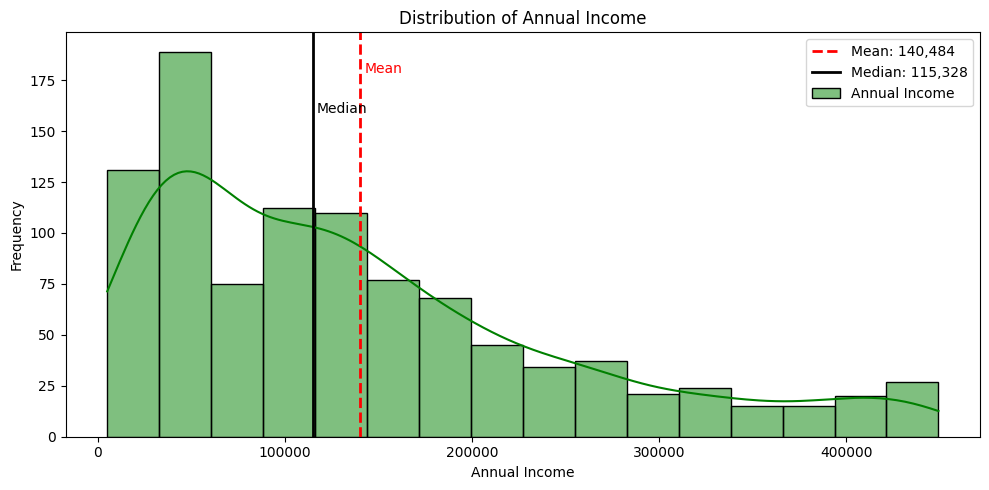

In [15]:
# Distribution of annual income with annotations
plt.figure(figsize=(10, 5))

# Plot the histogram and KDE
sns.histplot(df_cust['annual_income'], kde=True, color='green', label='Annual Income')

# Calculate mean and median
mean_income = df_cust['annual_income'].mean()
median_income = df_cust['annual_income'].median()

# Add vertical lines for mean and median
plt.axvline(mean_income, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_income:,.0f}')
plt.axvline(median_income, color='black', linestyle='-', linewidth=2, label=f'Median: {median_income:,.0f}')

# Add annotations as text
plt.text(mean_income + 2000, plt.ylim()[1]*0.9, 'Mean', color='red')
plt.text(median_income + 2000, plt.ylim()[1]*0.8, 'Median', color='black')

# Title and labels
plt.title('Distribution of Annual Income')
plt.xlabel('Annual Income')
plt.ylabel('Frequency')
plt.legend()
plt.tight_layout()
plt.show()


#### Average Annual Income by Occupation

In [16]:
# Calculate the average annual income per occupation
avg_income_per_occupation  = df_cust.groupby("occupation")["annual_income"].mean().sort_values(ascending=False)
avg_income_per_occupation

occupation
Business Owner         268447.368512
Data Scientist         137021.266304
Fullstack Developer     78727.972973
Freelancer              76327.508772
Accountant              64123.562500
Consultant              60703.154639
Artist                  45309.236842
Name: annual_income, dtype: float64

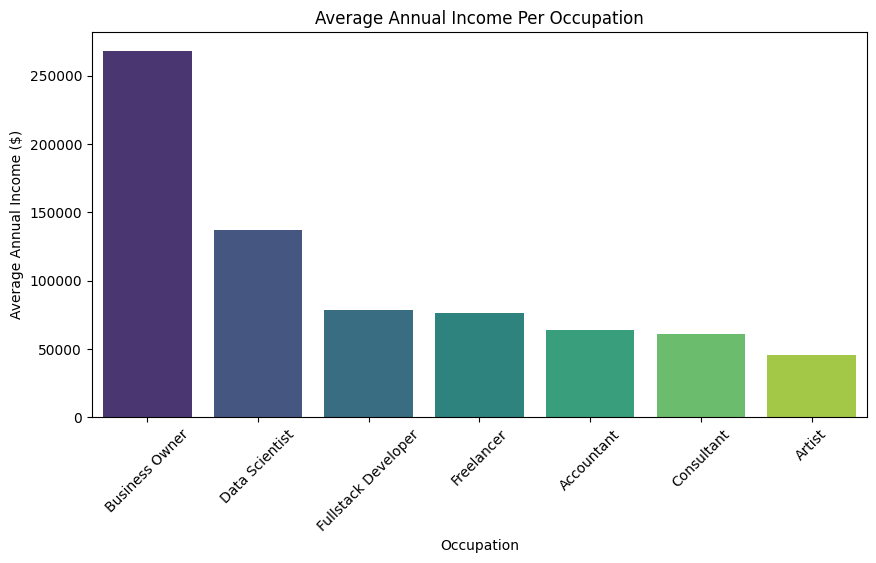

In [17]:
# Plotting the average annual income per occupation using seaborn
plt.figure(figsize=(10,5))
sns.barplot(x=avg_income_per_occupation.index, y=avg_income_per_occupation.values, palette='viridis')
plt.xticks(rotation=45)
plt.title('Average Annual Income Per Occupation')
plt.xlabel('Occupation')
plt.ylabel('Average Annual Income ($)')
plt.show()

#### Average Annual Income by Gender, Location, Occupation, and Marital Status

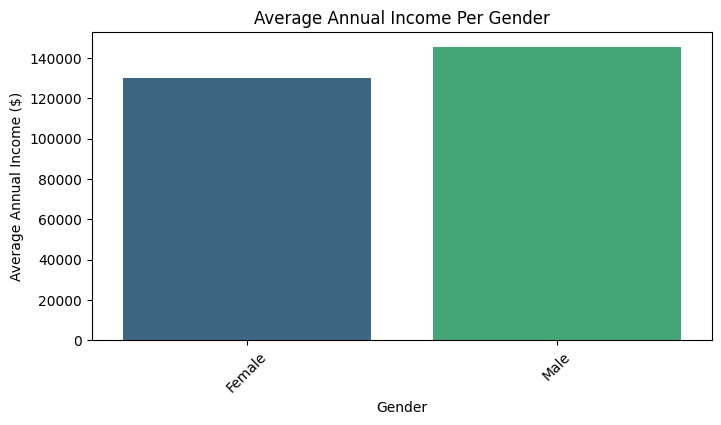

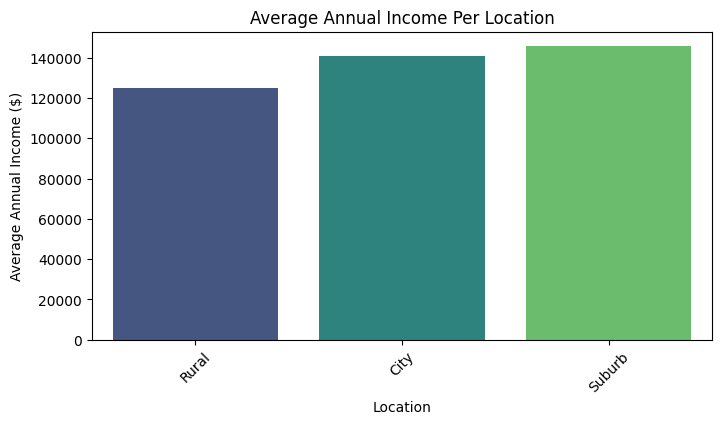

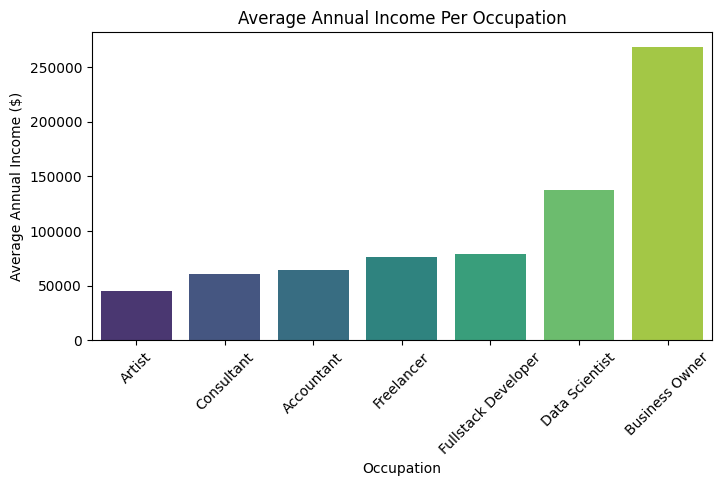

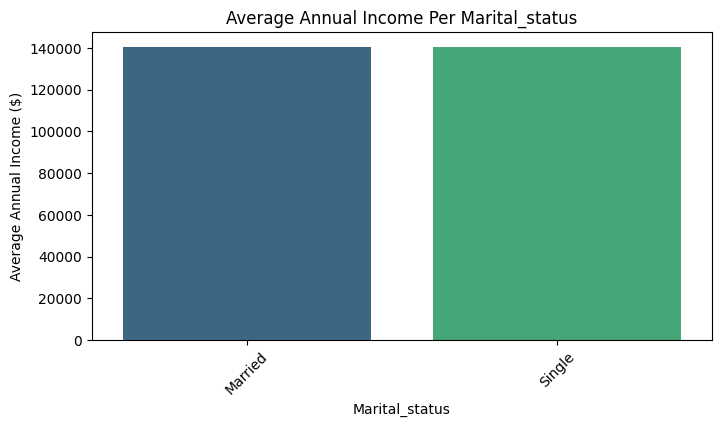

In [18]:
# List of categorical columns
categorical_columns = ['gender', 'location', 'occupation', 'marital_status']

# Loop through each categorical column and plot a bar chart of average annual income
for col in categorical_columns:
    plt.figure(figsize=(8, 4))
    avg_income_per_group = df_cust.groupby(col)['annual_income'].mean().sort_values()
    sns.barplot(x=avg_income_per_group.index, y=avg_income_per_group.values, palette='viridis')
    plt.xticks(rotation=45)
    plt.title(f'Average Annual Income Per {col.capitalize()}')
    plt.xlabel(col.capitalize())
    plt.ylabel('Average Annual Income ($)')
    plt.show()

### __Age Cleaning and Analysis__
#### Handling Missing Values In Age

In [19]:
# Display missing values in the customer data
df_cust.isnull().sum()

cust_id           0
name              0
gender            0
age               0
location          0
occupation        0
annual_income     0
marital_status    0
dtype: int64

#### Handling Outliers In Age

In [20]:
df_cust.age.describe()

count    1000.000000
mean       36.405000
std        15.666155
min         1.000000
25%        26.000000
50%        32.000000
75%        46.000000
max       135.000000
Name: age, dtype: float64

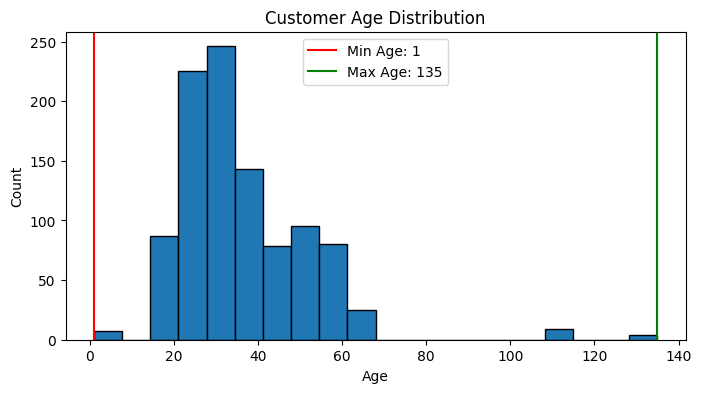

In [21]:
# Calculate the minimum and maximum age and plot the distribution
min_age = df_cust.age.min()
max_age = df_cust.age.max()

min_age, max_age

plt.figure(figsize=(8, 4))
plt.hist(df_cust.age, bins=20, edgecolor='black')
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Customer Age Distribution")

plt.axvline(min_age, color="red", label=f"Min Age: {min_age}")
plt.axvline(max_age, color="green", label=f"Max Age: {max_age}")

plt.legend()
plt.show()

We can clearly see from the histogram that we have ages around one and 135 which are outlier, those ages are not eligible to work in any scenario so we will be handling them as our outliers- any age below 15 and above 80 will be considered as outliers.   

In [22]:
# Identify and display customers with ages outside the range of 15 to 80- Outliers
outliers = df_cust[(df_cust.age<15)|(df_cust.age>80)]
outliers_count = outliers.shape[0]
outliers_count

20

I will calculte median per occupation and then use that for replacing outliers

In [23]:
median_age_per_occupation = df_cust.groupby('occupation')['age'].median()
median_age_per_occupation

occupation
Accountant             31.5
Artist                 26.0
Business Owner         51.0
Consultant             46.0
Data Scientist         32.0
Freelancer             24.0
Fullstack Developer    27.5
Name: age, dtype: float64

In [24]:
# Replace outlier ages with the median age for their respective occupation
for index, row in outliers.iterrows():
    if pd.notnull(row['age']):
        occupation = df_cust.at[index, 'occupation']
        df_cust.at[index, 'age'] = median_age_per_occupation[occupation]

In [25]:
# Identify and display customers with ages outside the range of 15 to 80- Outliers
outliers = df_cust[(df_cust.age<15)|(df_cust.age>80)]
outliers_count = outliers.shape[0]
outliers_count

0

#### Distribution of Age with Annotations

In [26]:
# Define the bin edges and labels
bin_edges = [17, 25, 48, 65]  # Adjust as needed
bin_labels = ['18-25', '26-48', '49-65']

# Use the cut function to bin and label the age column
pd.cut(df_cust['age'], bins=bin_edges, labels=bin_labels)

0      49-65
1      26-48
2      18-25
3      18-25
4      26-48
       ...  
995    26-48
996    49-65
997    26-48
998    26-48
999    26-48
Name: age, Length: 1000, dtype: category
Categories (3, object): ['18-25' < '26-48' < '49-65']

In [27]:
# Define the bin edges and labels
bin_edges = [17, 25, 48, 65]  # Adjust as needed
bin_labels = ['18-25', '26-48', '49-65']

# Use the cut function to bin and label the age column
df_cust['age_group'] = pd.cut(df_cust['age'], bins=bin_edges, labels=bin_labels)
df_cust.head()

,cust_id,name,gender,age,location,occupation,annual_income,marital_status,age_group
0,1,Manya Acharya,Female,51.0,City,Business Owner,358211.0,Married,49-65
1,2,Anjali Pandey,Female,47.0,City,Consultant,65172.0,Single,26-48
2,3,Aaryan Chauhan,Male,21.0,City,Freelancer,22378.0,Married,18-25
3,4,Rudra Bali,Male,24.0,Rural,Freelancer,33563.0,Married,18-25
4,5,Advait Malik,Male,48.0,City,Consultant,39406.0,Married,26-48


In [28]:
# Display the value counts of the age groups
df_cust['age_group'].value_counts(normalize=True)*100

age_group
26-48    56.7
18-25    24.6
49-65    18.7
Name: proportion, dtype: float64

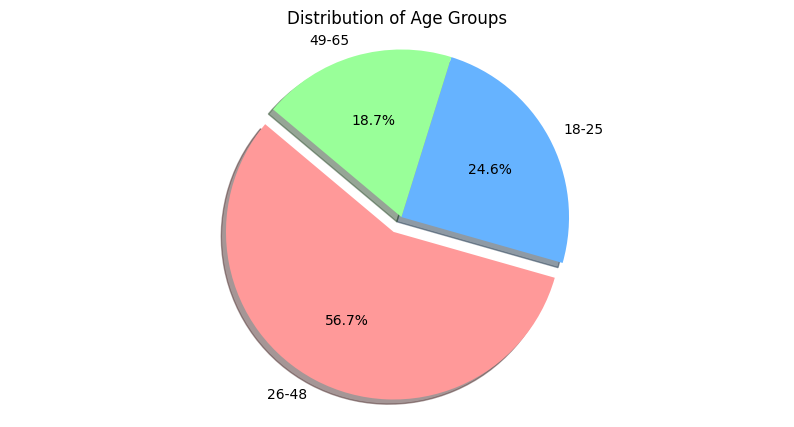

In [29]:
# Calculate the count of values in each age group
age_group_counts = df_cust['age_group'].value_counts(normalize=True) * 100

# Plot the pie chart
plt.figure(figsize=(10, 5))
plt.pie(
    age_group_counts, 
    labels=age_group_counts.index, 
    explode=(0.1,0,0), 
    autopct='%1.1f%%', 
    shadow=True,
    startangle=140,
    colors=['#ff9999','#66b3ff','#99ff99'])
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Distribution of Age Groups')
plt.show()

#### Customer Distribution by Location and Gender

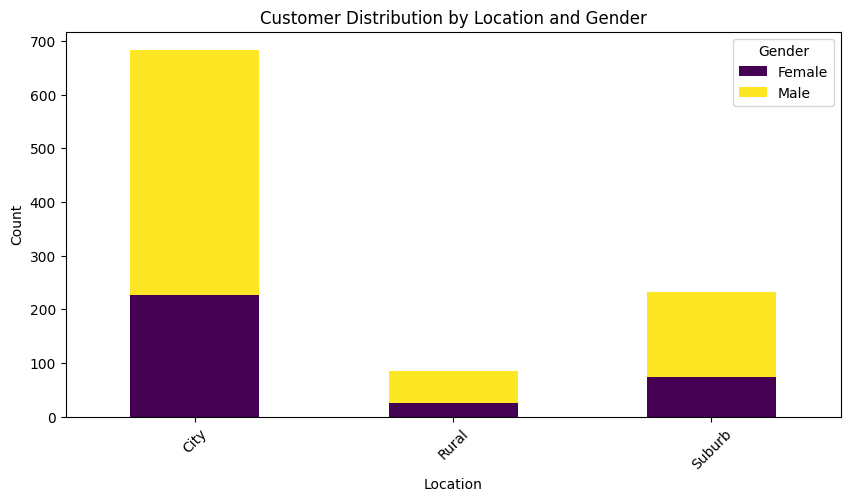

In [30]:
# Group the customer data by location
customer_location_gender = df_cust.groupby(['location', 'gender']).size().unstack(fill_value=0)

# Create a stacked bar chart to visualize the distribution of payment types for each occupation
customer_location_gender.plot(kind='bar', stacked=True, figsize=(10, 5), colormap='viridis')

# Add labels and title
plt.xlabel('Location')
plt.ylabel('Count')
plt.title('Customer Distribution by Location and Gender')

# Show the bar chart
plt.legend(title='Gender', bbox_to_anchor=(1, 1))  # Add a legend

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

plt.show()

## __Exploring the Credit Score Data__

### __Credit Score Cleaning and Analysis__
#### Handling Duplicate Values

In [31]:
# Display the first few rows of the credit score table
df_cs.head()

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit
0,1,749,0.585171,19571.0,0.0,40000.0
1,2,587,0.107928,161644.0,2.0,1250.0
2,3,544,0.854807,513.0,4.0,1000.0
3,4,504,0.336938,224.0,2.0,1000.0
4,5,708,0.586151,18090.0,2.0,40000.0


In [32]:
# Display the shape of the credit score data
df_cs.shape

(1004, 6)

The dataframe contains 1004 rows, while the customers dataframe has only 1000. This suggests that there may be duplicate or invalid entries in df_cs.

In [33]:
# Display the duplicated rows
df_cs[df_cs.duplicated('cust_id', keep=False)]

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit
516,517,308,NaN,NaN,NaN,NaN
517,517,308,0.113860,33.0,3.0,500.0
569,569,344,NaN,NaN,NaN,NaN
570,569,344,0.112599,37.0,0.0,500.0
607,606,734,NaN,NaN,NaN,NaN
608,606,734,0.193418,4392.0,1.0,40000.0
664,662,442,NaN,NaN,NaN,NaN
665,662,442,0.856039,266.0,2.0,500.0


In [34]:
# Remove duplicates, keep the last occurrence
df_cs_clean_1 = df_cs.drop_duplicates(subset='cust_id', keep="last")
df_cs_clean_1.shape

(1000, 6)

#### Handling Null Values in Credit Score Data

In [35]:
# Display the missing values in the credit score data
df_cs_clean_1.isnull().sum()

cust_id                            0
credit_score                       0
credit_utilisation                 0
outstanding_debt                   0
credit_inquiries_last_6_months     0
credit_limit                      65
dtype: int64

The credit_limit column contains several missing values that need to be cleaned. Based on business knowledge, we know that a customer’s credit limit is influenced by their credit score. We’ll explore the data to see if a mathematical relationship exists between credit score and credit limit. If such a relationship is found, we can use it to fill in the missing values for credit limit. Let’s begin by exploring this further.

In [36]:
# Display the rows with missing credit limit values
df_cs_clean_1[df_cs_clean_1.credit_limit.isnull()]

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit
10,11,679,0.557450,9187.0,2.0,NaN
35,36,790,0.112535,4261.0,1.0,NaN
37,38,514,0.296971,238.0,2.0,NaN
45,46,761,0.596041,24234.0,2.0,NaN
64,65,734,0.473715,13631.0,0.0,NaN
...,...,...,...,...,...,...
912,909,479,0.487555,320.0,3.0,NaN
931,928,311,0.832244,316.0,2.0,NaN
948,945,526,0.272734,227.0,1.0,NaN
954,951,513,0.175914,131.0,3.0,NaN


Credit limit has only few unique values. Let's check the count for each of these unique values

In [37]:
df_cs_clean_1['credit_limit'].value_counts()

credit_limit
500.0      229
60000.0    186
40000.0    137
1500.0     100
1000.0      90
750.0       76
1250.0      75
20000.0     42
Name: count, dtype: int64

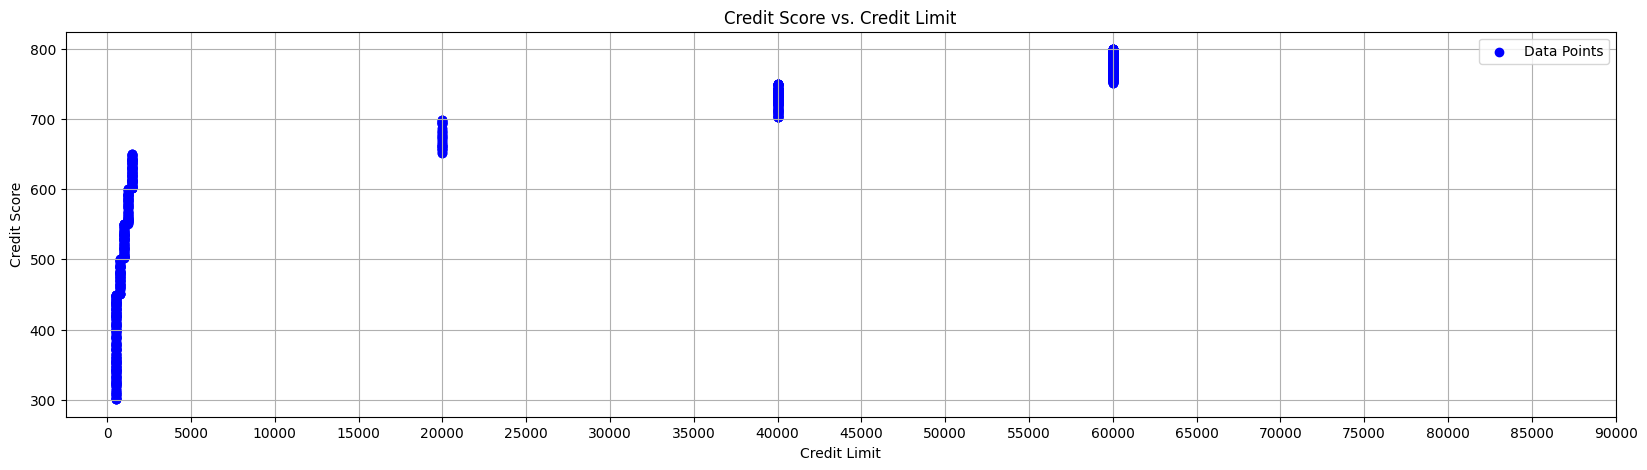

In [38]:
# Looking at scatter plot for credit score vs credit_limit again (after handling oultiers)
# Create a scatter plot
plt.figure(figsize=(20, 5))
plt.scatter(df_cs_clean_1['credit_limit'], df_cs_clean_1['credit_score'], c='blue', marker='o', label='Data Points')

# Customize the plot
plt.title('Credit Score vs. Credit Limit')
plt.xlabel('Credit Limit')
plt.ylabel('Credit Score')

# Adjust the y-axis bin interval to 1000
plt.xticks(range(0, 90001, 5000))
plt.grid(True)

# Show the plot
plt.legend()
plt.show()

We can observe a clear relationship between credit score and credit limit. Customers with a credit score below 650 typically receive a very low credit limit, usually less than $1,000. Those with scores between 650 and 700 tend to have credit limits around $20,000, while customers with scores between 700 and 750 generally receive limits closer to $40,000. This tiered pattern suggests that credit limit increases with credit score, following distinct bands or levels.

In [39]:
# Engineerate credit score ranges based on the relationship between credit score and credit limit
# Define bin ranges
bin_ranges = [300, 450, 500, 550, 600, 650, 700, 750, 800]

# Create labels for the bins
bin_labels = [f'{start}-{end-1}' for start, end in zip(bin_ranges, bin_ranges[1:])]

# Use pd.cut to assign data to bins
df_cs_clean_1['credit_score_range'] = pd.cut(df_cs_clean_1['credit_score'], bins=bin_ranges, labels=bin_labels, include_lowest=True, right=False)

# Display the first few rows of the updated credit score data
df_cs_clean_1.head()

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range
0,1,749,0.585171,19571.0,0.0,40000.0,700-749
1,2,587,0.107928,161644.0,2.0,1250.0,550-599
2,3,544,0.854807,513.0,4.0,1000.0,500-549
3,4,504,0.336938,224.0,2.0,1000.0,500-549
4,5,708,0.586151,18090.0,2.0,40000.0,700-749


In [40]:
# Display credit score range 750-799
df_cs_clean_1[df_cs_clean_1['credit_score_range']=="750-799"]

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range
21,22,785,0.897089,36083.0,3.0,60000.0,750-799
25,26,758,0.250811,190838.0,2.0,60000.0,750-799
26,27,766,0.830908,31344.0,3.0,60000.0,750-799
29,30,798,0.222597,7238.0,2.0,60000.0,750-799
31,32,768,0.747793,35109.0,2.0,60000.0,750-799
...,...,...,...,...,...,...,...
988,985,770,0.628088,33405.0,2.0,60000.0,750-799
993,990,772,0.259958,11937.0,2.0,60000.0,750-799
996,993,782,0.477170,20305.0,2.0,60000.0,750-799
1000,997,774,0.465462,17139.0,0.0,60000.0,750-799


In [41]:
# Display credit score range 300-449
df_cs_clean_1[df_cs_clean_1['credit_score_range']=="300-449"]

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range
5,6,442,0.705409,246.0,4.0,500.0,300-449
11,12,429,0.627645,263.0,0.0,500.0,300-449
15,16,347,0.531660,190.0,0.0,500.0,300-449
18,19,447,0.795650,292.0,1.0,500.0,300-449
20,21,381,0.714710,307.0,0.0,500.0,300-449
...,...,...,...,...,...,...,...
981,978,371,0.435307,183.0,2.0,500.0,300-449
982,979,332,0.150815,65.0,1.0,500.0,300-449
984,981,327,0.377202,108.0,3.0,500.0,300-449
989,986,425,0.178470,56.0,4.0,500.0,300-449


As seen above, customers with a credit score in the range of 750–799 typically have a credit limit of around $60,000, while those in the 300–449 range have a limit closer to $500. This reinforces the pattern of increasing credit limits with higher credit scores. To handle missing values, we can use the mode (most frequently occurring value) of the credit limit within each score range, as it provides a reliable estimate based on existing data.

In [42]:
# Calculate the mode of credit limit for each credit score range
mode_df = df_cs_clean_1.groupby('credit_score_range')['credit_limit'].agg(lambda x: x.mode().iloc[0]).reset_index()
mode_df

,credit_score_range,credit_limit
0,300-449,500.0
1,450-499,750.0
2,500-549,1000.0
3,550-599,1250.0
4,600-649,1500.0
5,650-699,20000.0
6,700-749,40000.0
7,750-799,60000.0


In [43]:
# Merge the mode values back with the original DataFrame
df_cs_clean_2 = pd.merge(df_cs_clean_1, mode_df, on='credit_score_range', suffixes=('', '_mode'))
df_cs_clean_2.sample(3)

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range,credit_limit_mode
691,692,769,0.225248,11578.0,2.0,60000.0,750-799,60000.0
735,736,483,0.693349,385.0,0.0,750.0,450-499,750.0
636,637,420,0.323984,140063.0,4.0,500.0,300-449,500.0


In [44]:
# Randomly selects 3 rows from the dataset where the 'credit_limit' value is missing (NaN)
df_cs_clean_2[df_cs_clean_2.credit_limit.isnull()].sample(3)

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range,credit_limit_mode
45,46,761,0.596041,24234.0,2.0,NaN,750-799,60000.0
841,842,490,0.555309,249.0,1.0,NaN,450-499,750.0
37,38,514,0.296971,238.0,2.0,NaN,500-549,1000.0


We can replace the missing values in the credit_limit column with the credit_limit_mode, which represents the most frequently occurring credit limit within each credit score range. This makes it a suitable replacement.

To ensure reproducibility and retain access to the original data, we’ll create a new copy of the dataframe before making these changes.

In [45]:
df_cs_clean_3 = df_cs_clean_2.copy()
df_cs_clean_3['credit_limit'].fillna(df_cs_clean_3['credit_limit_mode'], inplace=True)
df_cs_clean_3.shape

(1000, 8)

In [46]:
# Show null values
df_cs_clean_3.isnull().sum()

cust_id                           0
credit_score                      0
credit_utilisation                0
outstanding_debt                  0
credit_inquiries_last_6_months    0
credit_limit                      0
credit_score_range                0
credit_limit_mode                 0
dtype: int64

#### Handling Outliers in Outstanding Debt

In [47]:
# Show summary statistics
df_cs_clean_3.describe()

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_limit_mode
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,500.500000,589.182000,0.498950,9683.597000,1.955000,19733.75000,19912.500000
std,288.819436,152.284929,0.233139,25255.893671,1.414559,24717.43818,24840.914633
min,1.000000,300.000000,0.103761,33.000000,0.000000,500.00000,500.000000
25%,250.750000,460.000000,0.293917,221.000000,1.000000,750.00000,750.000000
50%,500.500000,601.500000,0.487422,550.000000,2.000000,1500.00000,1500.000000
75%,750.250000,738.000000,0.697829,11819.500000,3.000000,40000.00000,40000.000000
max,1000.000000,799.000000,0.899648,209901.000000,4.000000,60000.00000,60000.000000


By comparing the minimum and maximum values across columns, we notice that the maximum value of outstanding_debt exceeds the maximum value of credit_limit. However, based on business rules, a customer’s outstanding debt should never exceed their credit limit, as they are not allowed to spend beyond it. Let's check how many such cases exist in the dataset.

Text(0.5, 1.0, 'Box plot for outstanding debt')

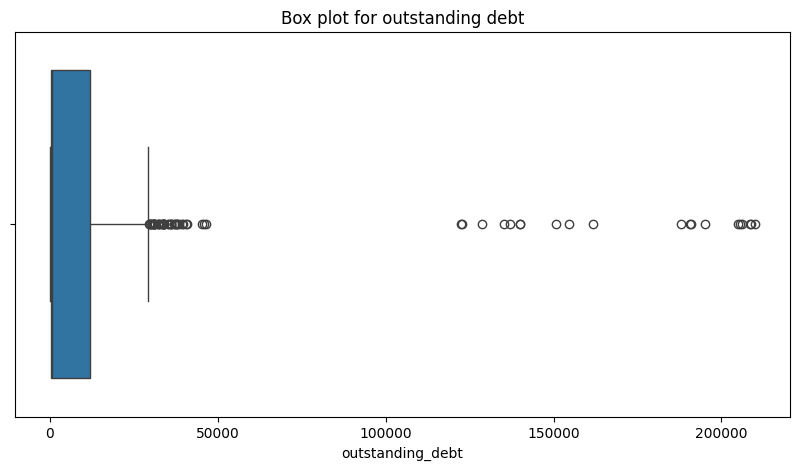

In [48]:
# Create a figure with specified size
plt.figure(figsize=(10, 5))

# Plot a boxplot for the 'outstanding_debt' column to visualize its distribution and detect outliers
sns.boxplot(x=df_cs_clean_3['outstanding_debt'])

# Set the title of the plot
plt.title('Box plot for outstanding debt')

Rather than applying a statistical method like standard deviation or IQR, we will rely on business knowledge in this case as well. Any outstanding_debt value that exceeds the corresponding credit_limit will be considered an outlier.

In [49]:
# Identify and display rows where the 'outstanding_debt' exceeds the 'credit_limit',
# as these cases violate the business rule and are considered outliers
df_cs_clean_3.loc[df_cs_clean_3['outstanding_debt'] > df_cs_clean_3['credit_limit'], 'outstanding_debt']

1      161644.0
19     205014.0
25     190838.0
38     122758.0
93     137058.0
204    187849.0
271    154568.0
301    122402.0
330    208898.0
350    150860.0
446    206191.0
544    135112.0
636    140063.0
646    128818.0
698    190717.0
723    140008.0
725    205404.0
730    209901.0
766    195004.0
862    208406.0
Name: outstanding_debt, dtype: float64

In [50]:
# For rows where 'outstanding_debt' exceeds 'credit_limit',
# replace the 'outstanding_debt' value with the corresponding 'credit_limit' value
# to enforce the business rule that debt cannot be greater than credit limit
df_cs_clean_3.loc[df_cs_clean_3['outstanding_debt'] > df_cs_clean_3['credit_limit'], 'outstanding_debt'] = df_cs_clean_3['credit_limit']

In [51]:
# Check and display any rows where 'outstanding_debt' still exceeds 'credit_limit'
# to verify if there are any remaining violations of the business rule
df_cs_clean_3[df_cs_clean_3.outstanding_debt > df_cs_clean_3.credit_limit]

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range,credit_limit_mode


#### Visualizing Correlation in Credit Score Table

To better understand the relationship between the features in our dataset, I will merge the customer data with the credit score data. This will allow us to analyze how customer demographics relate to their credit scores and limits.

In [52]:
# Merge the customer dataframe (df_cust) with the cleaned credit score dataframe (df_cs_clean_3)
# using 'cust_id' as the key and an inner join to keep only matching records
df_merged = df_cust.merge(df_cs_clean_3, on='cust_id', how='inner')

# Display the first two rows of the merged dataframe to verify the result
df_merged.head(2)

,cust_id,name,gender,age,location,occupation,annual_income,marital_status,age_group,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range,credit_limit_mode
0,1,Manya Acharya,Female,51.0,City,Business Owner,358211.0,Married,49-65,749,0.585171,19571.0,0.0,40000.0,700-749,40000.0
1,2,Anjali Pandey,Female,47.0,City,Consultant,65172.0,Single,26-48,587,0.107928,1250.0,2.0,1250.0,550-599,1250.0


In [53]:
# Define a list of numerical columns to analyze correlations
numerical_cols = ['credit_score', 'credit_utilisation', 'outstanding_debt', 'credit_limit', 'annual_income', 'age']

# Calculate the correlation matrix for the selected numerical columns in the merged dataframe
correlation_matrix = df_merged[numerical_cols].corr()

# Display the correlation matrix
correlation_matrix

,credit_score,credit_utilisation,outstanding_debt,credit_limit,annual_income,age
credit_score,1.000000,-0.070445,0.680654,0.847952,0.575751,0.444917
credit_utilisation,-0.070445,1.000000,0.192838,-0.080493,-0.086368,-0.027713
outstanding_debt,0.680654,0.192838,1.000000,0.810581,0.555661,0.444301
credit_limit,0.847952,-0.080493,0.810581,1.000000,0.684775,0.510993
annual_income,0.575751,-0.086368,0.555661,0.684775,1.000000,0.619037
age,0.444917,-0.027713,0.444301,0.510993,0.619037,1.000000


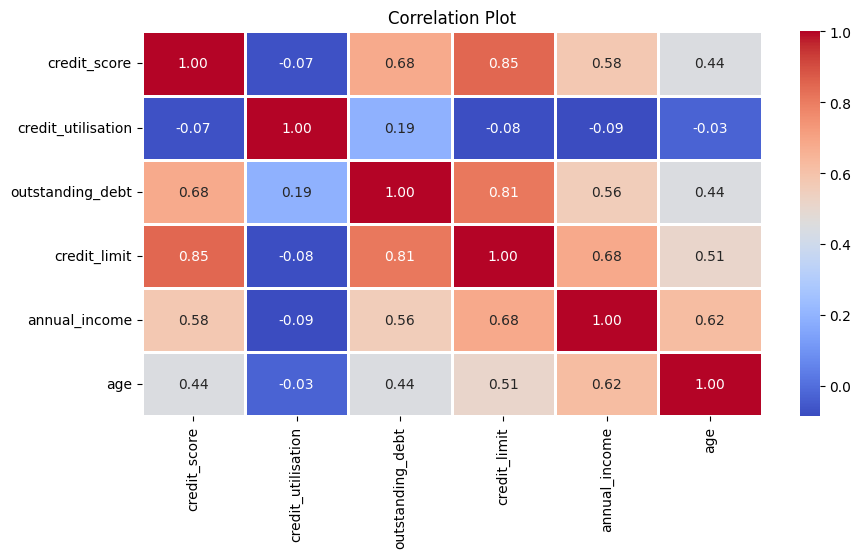

In [54]:
# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 5))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.9)
plt.title('Correlation Plot')
plt.show()

There is a strong correlation between credit limit and credit score, approximately 0.85.

Additionally, credit limit and annual income also show a high correlation.

This correlation matrix serves as a useful tool for further analysis, indicating the strength of relationships between different variables.

## __Exploring the Transactins Data__

In [55]:
# Display the first few rows of the transactions data
df_trans.head()

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
0,1,705,2023-01-01,63,Flipkart,Electronics,Phonepe
1,2,385,2023-01-01,99,Alibaba,Fashion & Apparel,Credit Card
2,3,924,2023-01-01,471,Shopify,Sports,Phonepe
3,4,797,2023-01-01,33,Shopify,Fashion & Apparel,Gpay
4,5,482,2023-01-01,68,Amazon,Fashion & Apparel,Net Banking


In [56]:
# Display the shape of the transactions data
df_trans.shape

(500000, 7)

#### Handling null values in platform feature

In [57]:
# Calculate and display the count of missing values in each column of the transactions dataframe
df_trans.isnull().sum()

tran_id                0
cust_id                0
tran_date              0
tran_amount            0
platform            4941
product_category       0
payment_type           0
dtype: int64

In [58]:
# Filter and display rows in the transactions dataframe where the 'platform' value is missing (null)
df_trans[df_trans.platform.isnull()]

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
355,356,58,2023-01-01,237,NaN,Electronics,Net Banking
418,419,383,2023-01-01,338,NaN,Electronics,Credit Card
607,608,421,2023-01-01,700,NaN,Electronics,Phonepe
844,845,945,2023-01-01,493,NaN,Sports,Credit Card
912,913,384,2023-01-01,85,NaN,Fashion & Apparel,Phonepe
...,...,...,...,...,...,...,...
499579,499580,924,2023-09-05,31,NaN,Fashion & Apparel,Gpay
499646,499647,944,2023-09-05,58445,NaN,Fashion & Apparel,Phonepe
499725,499726,620,2023-09-05,15,NaN,Sports,Net Banking
499833,499834,616,2023-09-05,97,NaN,Fashion & Apparel,Credit Card


<Axes: xlabel='count', ylabel='product_category'>

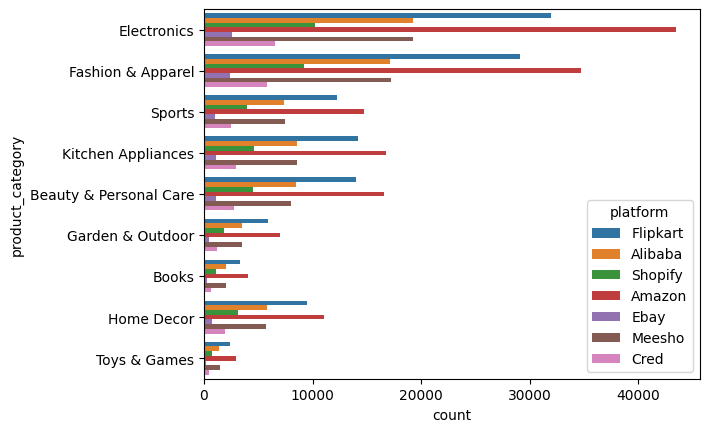

In [59]:
# Create a horizontal count plot showing the distribution of transactions by product category,
# with bars split by platform to compare counts across different platforms
sns.countplot(y='product_category', hue='platform', data=df_trans)

The chart shows that Amazon is the most commonly used platform for purchases across all product categories. To handle the missing values in the platform column, we could consider replacing them with "Amazon," since it is the most frequently used platform.

In [60]:
# Replace missing values in the 'platform' column with the most frequent platform (mode) found in the data
df_trans['platform'].fillna(df_trans.platform.mode()[0], inplace=True)

In [61]:
# Check and display the count of any remaining missing values in each column of the transactions dataframe
df_trans.isnull().sum()

tran_id             0
cust_id             0
tran_date           0
tran_amount         0
platform            0
product_category    0
payment_type        0
dtype: int64

#### Handling Outliers in Transaction Amounts

In [62]:
# Generate summary statistics for numerical columns in the transactions dataframe
df_trans.describe()

,tran_id,cust_id,tran_amount
count,500000.000000,500000.000000,500000.00000
mean,250000.500000,501.400428,3225.20733
std,144337.711635,288.641924,13098.74276
min,1.000000,1.000000,0.00000
25%,125000.750000,252.000000,64.00000
50%,250000.500000,502.000000,141.00000
75%,375000.250000,752.000000,397.00000
max,500000.000000,1000.000000,69999.00000


We can see transactions with 0 amount. These seem to be invalid

In [63]:
# Filter transactions where the transaction amount is zero
df_trans_zero = df_trans[df_trans.tran_amount == 0]

# Display the first three rows of these zero-amount transactions
df_trans_zero.head()

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
120,121,440,2023-01-01,0,Amazon,Electronics,Credit Card
141,142,839,2023-01-01,0,Amazon,Electronics,Credit Card
517,518,147,2023-01-01,0,Amazon,Electronics,Credit Card
533,534,891,2023-01-01,0,Amazon,Electronics,Credit Card
586,587,108,2023-01-01,0,Amazon,Electronics,Credit Card


In [64]:
# Count the number of zero-amount transactions by platform to see which platforms have such transactions
df_trans_zero.platform.value_counts()

platform
Amazon    4734
Name: count, dtype: int64

In [65]:
# Count the occurrences of unique combinations of 'platform', 'product_category', and 'payment_type'
# within the zero-amount transactions to understand their distribution
df_trans_zero[['platform', 'product_category', 'payment_type']].value_counts()

platform  product_category  payment_type
Amazon    Electronics       Credit Card     4734
Name: count, dtype: int64

It appears that all zero-amount transactions occur when the platform is Amazon, the product category is Electronics, and the payment type is Credit Card. To address these zeros, we should look at other transactions within this group and use the median transaction amount to replace the zero values. We prefer the median over the mean because the data contains outliers that could skew the average.

In [66]:
# Filter transactions where platform is Amazon, product category is Electronics,
# and payment type is Credit Card, then check the shape of this subset
df_trans_1 = df_trans[
    (df_trans.platform == 'Amazon') &
    (df_trans.product_category == 'Electronics') &
    (df_trans.payment_type == 'Credit Card')
]

df_trans_1.shape

(15637, 7)

In [67]:
# Select transactions from the filtered subset where the transaction amount is greater than zero
df_trans_1[df_trans_1.tran_amount > 0]

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
109,110,887,2023-01-01,635,Amazon,Electronics,Credit Card
173,174,676,2023-01-01,60439,Amazon,Electronics,Credit Card
190,191,763,2023-01-01,697,Amazon,Electronics,Credit Card
263,264,528,2023-01-01,421,Amazon,Electronics,Credit Card
311,312,936,2023-01-01,537,Amazon,Electronics,Credit Card
...,...,...,...,...,...,...,...
499766,499767,723,2023-09-05,909,Amazon,Electronics,Credit Card
499793,499794,586,2023-09-05,304,Amazon,Electronics,Credit Card
499812,499813,688,2023-09-05,425,Amazon,Electronics,Credit Card
499860,499861,373,2023-09-05,480,Amazon,Electronics,Credit Card


In [68]:
# Calculate the median transaction amount for Amazon Electronics transactions paid by Credit Card,
# excluding zero-amount transactions, to use for replacing zero values
median_to_replace = df_trans_1[df_trans_1.tran_amount > 0].tran_amount.median()

# Display the calculated median value
median_to_replace

np.float64(554.0)

In [69]:
# Replace all zero values in the 'tran_amount' column with the median transaction amount calculated earlier
df_trans['tran_amount'].replace(0, median_to_replace, inplace=True)

In [70]:
# Display all transactions where the transaction amount is still zero
df_trans[df_trans.tran_amount == 0]

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type


As you can see above, no zero values are left in tran_amount column

In [71]:
# Generate summary statistics for the 'tran_amount' column
df_trans.tran_amount.describe()


count    500000.000000
mean       3230.452602
std       13097.561071
min           2.000000
25%          66.000000
50%         146.000000
75%         413.000000
max       69999.000000
Name: tran_amount, dtype: float64

In [72]:
# Generate summary statistics for transactions where the amount is less than 1000
df_trans[df_trans['tran_amount'] < 1000].describe()

,tran_id,cust_id,tran_amount
count,475000.000000,475000.000000,475000.000000
mean,250041.699922,501.375499,240.667608
std,144285.259913,288.606185,244.487110
min,1.000000,1.000000,2.000000
25%,125126.750000,252.000000,63.000000
50%,250100.500000,502.000000,131.000000
75%,374928.250000,751.000000,348.000000
max,500000.000000,1000.000000,999.000000


In [73]:
# Calculate the first quartile (Q1) and third quartile (Q3) of 'tran_amount'
Q1, Q3 = df_trans['tran_amount'].quantile([0.25, 0.75])

# Calculate the interquartile range (IQR)
IQR = Q3 - Q1

# Define lower and upper bounds for outlier detection using 2 times IQR
lower = Q1 - 2 * IQR
upper = Q3 + 2 * IQR

# Display the calculated lower and upper bounds
lower, upper

(-628.0, 1107.0)

From the description of transaction amount, the lowest amount is 2 which is a reasonable figure, we will be focussing on the upper bound to identify outliers.

In [74]:
# Select transactions where the amount is greater than or equal to the upper outlier threshold
df_trans_outliers = df_trans[df_trans.tran_amount >= upper]

# Display these potential outlier transactions
df_trans_outliers

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
26,27,380,2023-01-01,61963,Shopify,Beauty & Personal Care,Credit Card
49,50,287,2023-01-01,57869,Amazon,Toys & Games,Gpay
94,95,770,2023-01-01,52881,Ebay,Kitchen Appliances,Credit Card
104,105,549,2023-01-01,58574,Flipkart,Fashion & Apparel,Gpay
113,114,790,2023-01-01,51669,Shopify,Kitchen Appliances,Credit Card
...,...,...,...,...,...,...,...
499742,499743,868,2023-09-05,55131,Meesho,Fashion & Apparel,Gpay
499888,499889,614,2023-09-05,59679,Meesho,Fashion & Apparel,Net Banking
499900,499901,811,2023-09-05,60184,Flipkart,Sports,Debit Card
499966,499967,662,2023-09-05,54678,Meesho,Sports,Gpay


In [75]:
# Select transactions where the amount is less than the upper outlier threshold
df_trans_normal = df_trans[df_trans.tran_amount < upper]

# Display the filtered transactions considered as normal (non-outliers)
df_trans_normal

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
0,1,705,2023-01-01,63,Flipkart,Electronics,Phonepe
1,2,385,2023-01-01,99,Alibaba,Fashion & Apparel,Credit Card
2,3,924,2023-01-01,471,Shopify,Sports,Phonepe
3,4,797,2023-01-01,33,Shopify,Fashion & Apparel,Gpay
4,5,482,2023-01-01,68,Amazon,Fashion & Apparel,Net Banking
...,...,...,...,...,...,...,...
499994,499995,679,2023-09-05,59,Ebay,Beauty & Personal Care,Gpay
499995,499996,791,2023-09-05,43,Amazon,Books,Phonepe
499997,499998,57,2023-09-05,224,Amazon,Garden & Outdoor,Phonepe
499998,499999,629,2023-09-05,538,Flipkart,Home Decor,Gpay


In [76]:
# Calculate the mean transaction amount for each product category using the filtered normal transactions
tran_mean_per_category = df_trans_normal.groupby("product_category")["tran_amount"].mean()

# Display the mean transaction amounts per product category
tran_mean_per_category

product_category
Beauty & Personal Care     92.167205
Books                      29.553515
Electronics               510.172685
Fashion & Apparel          64.553463
Garden & Outdoor          125.630277
Home Decor                302.487561
Kitchen Appliances        176.773288
Sports                    269.181631
Toys & Games               50.333298
Name: tran_amount, dtype: float64

In [77]:
# Replace the transaction amounts of outlier transactions with the mean transaction amount
# of their respective product categories calculated from normal transactions
df_trans.loc[df_trans_outliers.index, 'tran_amount'] = df_trans_outliers['product_category'].map(tran_mean_per_category)

In [78]:
# Display the updated outlier transactions after replacing their amounts with category means
df_trans.loc[df_trans_outliers.index]

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
26,27,380,2023-01-01,92.167205,Shopify,Beauty & Personal Care,Credit Card
49,50,287,2023-01-01,50.333298,Amazon,Toys & Games,Gpay
94,95,770,2023-01-01,176.773288,Ebay,Kitchen Appliances,Credit Card
104,105,549,2023-01-01,64.553463,Flipkart,Fashion & Apparel,Gpay
113,114,790,2023-01-01,176.773288,Shopify,Kitchen Appliances,Credit Card
...,...,...,...,...,...,...,...
499742,499743,868,2023-09-05,64.553463,Meesho,Fashion & Apparel,Gpay
499888,499889,614,2023-09-05,64.553463,Meesho,Fashion & Apparel,Net Banking
499900,499901,811,2023-09-05,269.181631,Flipkart,Sports,Debit Card
499966,499967,662,2023-09-05,269.181631,Meesho,Sports,Gpay


<Axes: xlabel='tran_amount', ylabel='Count'>

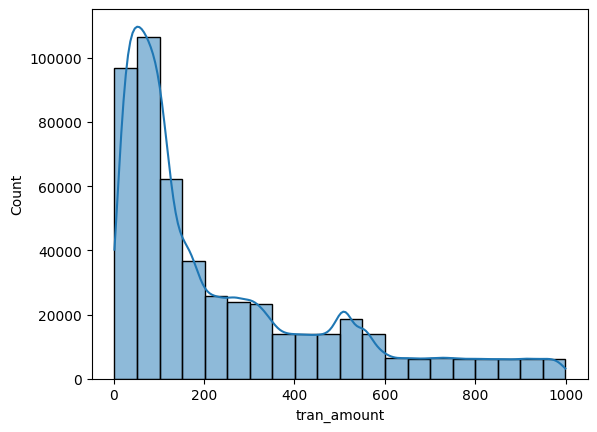

In [79]:
# Plot the distribution of transaction amounts with 20 bins and a Kernel Density Estimate overlay
sns.histplot(x='tran_amount', data=df_trans, bins=20, kde=True)

The histogram above displays the distribution of transaction amounts after outlier treatment. The distribution is right skewed, and the transaction amounts are now all below 1000.

#### Payment type distribution

<Axes: xlabel='payment_type', ylabel='percent'>

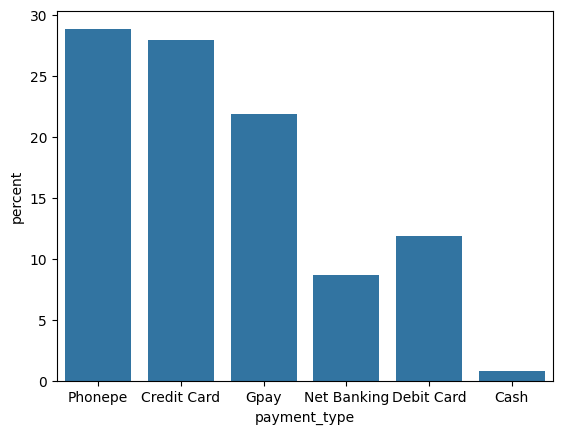

In [80]:
# Plot the percentage distribution of transactions by payment type
sns.countplot(x=df_trans.payment_type, stat='percent')

#### Distribution of payment types across age groups

In [81]:
# Merge the customer-credit data (df_merged) with the transaction data (df_trans) on 'cust_id'
# using an inner join to keep only customers with transaction records
df_merged_2 = df_merged.merge(df_trans, on='cust_id', how='inner')

# Display the first three rows of the merged dataframe
df_merged_2.head(3)

,cust_id,name,gender,age,location,occupation,annual_income,marital_status,age_group,credit_score,...,credit_inquiries_last_6_months,credit_limit,credit_score_range,credit_limit_mode,tran_id,tran_date,tran_amount,platform,product_category,payment_type
0,1,Manya Acharya,Female,51.0,City,Business Owner,358211.0,Married,49-65,749,...,0.0,40000.0,700-749,40000.0,1283,2023-01-01,30.0,Shopify,Fashion & Apparel,Net Banking
1,1,Manya Acharya,Female,51.0,City,Business Owner,358211.0,Married,49-65,749,...,0.0,40000.0,700-749,40000.0,1382,2023-01-01,96.0,Amazon,Sports,Debit Card
2,1,Manya Acharya,Female,51.0,City,Business Owner,358211.0,Married,49-65,749,...,0.0,40000.0,700-749,40000.0,1521,2023-01-01,86.0,Meesho,Garden & Outdoor,Gpay


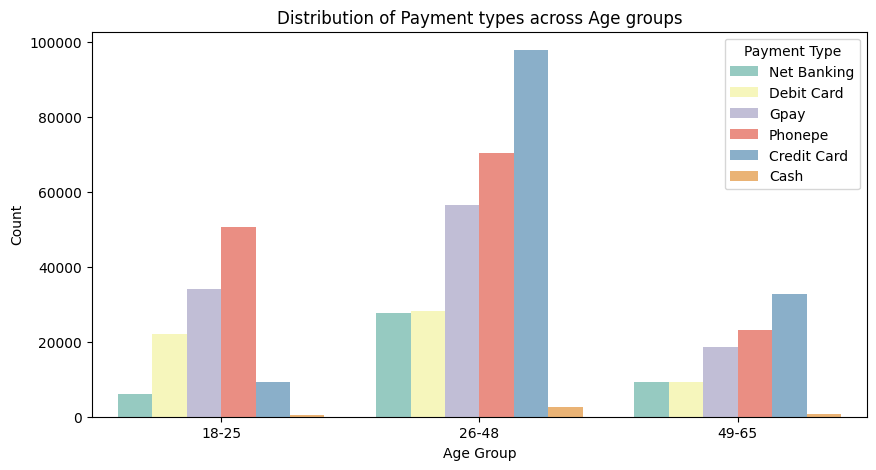

In [82]:
# Set the figure size for better readability
plt.figure(figsize=(10, 5))

# Create a count plot to show distribution of payment types across different age groups
# Using 'Set3' color palette for better color distinction
sns.countplot(x='age_group', hue='payment_type', data=df_merged_2, palette='Set3')

# Add title and axis labels
plt.title('Distribution of Payment types across Age groups')
plt.xlabel('Age Group')
plt.ylabel('Count')

# Keep x-axis labels horizontal for readability
plt.xticks(rotation=0)

# Place legend with title on the upper right corner
plt.legend(title='Payment Type', loc='upper right')

# Display the plot
plt.show()

From the analysis above, it is evident that the age group 18 to 25 uses credit cards less frequently compared to the other age groups.

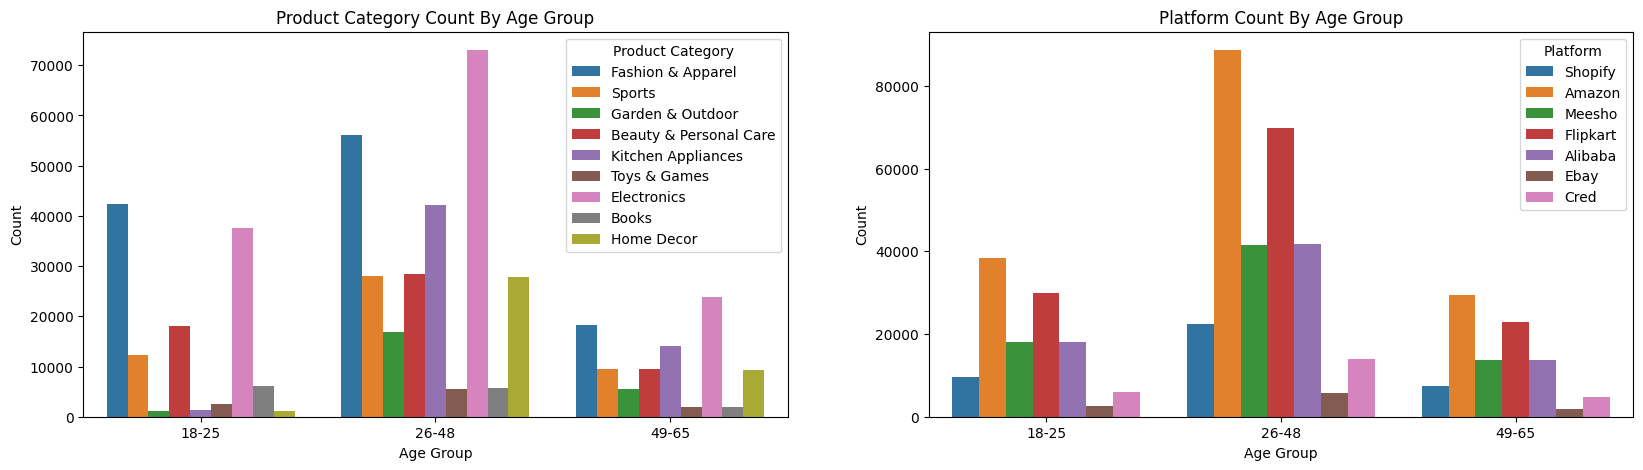

In [83]:
# Create a figure with 2 side-by-side subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))

# Plot count of product categories by age group on the first subplot
sns.countplot(x='age_group', hue='product_category', data=df_merged_2, ax=ax1)
ax1.set_title("Product Category Count By Age Group")
ax1.set_xlabel("Age Group")
ax1.set_ylabel("Count")
ax1.legend(title="Product Category", loc='upper right')

# Plot count of platforms by age group on the second subplot
sns.countplot(x='age_group', hue='platform', data=df_merged_2, ax=ax2)
ax2.set_title("Platform Count By Age Group")
ax2.set_xlabel("Age Group")
ax2.set_ylabel("Count")
ax2.legend(title="Platform", loc='upper right')

# Show both plots
plt.show()

Observations:
- The top three product categories purchased by customers aged 18 to 25 are Electronics, Fashion & Apparel, and Beauty & Personal Care.
- The leading platforms used by this age group are Amazon, Flipkart, and Alibaba.

#### Average Transaction Amount

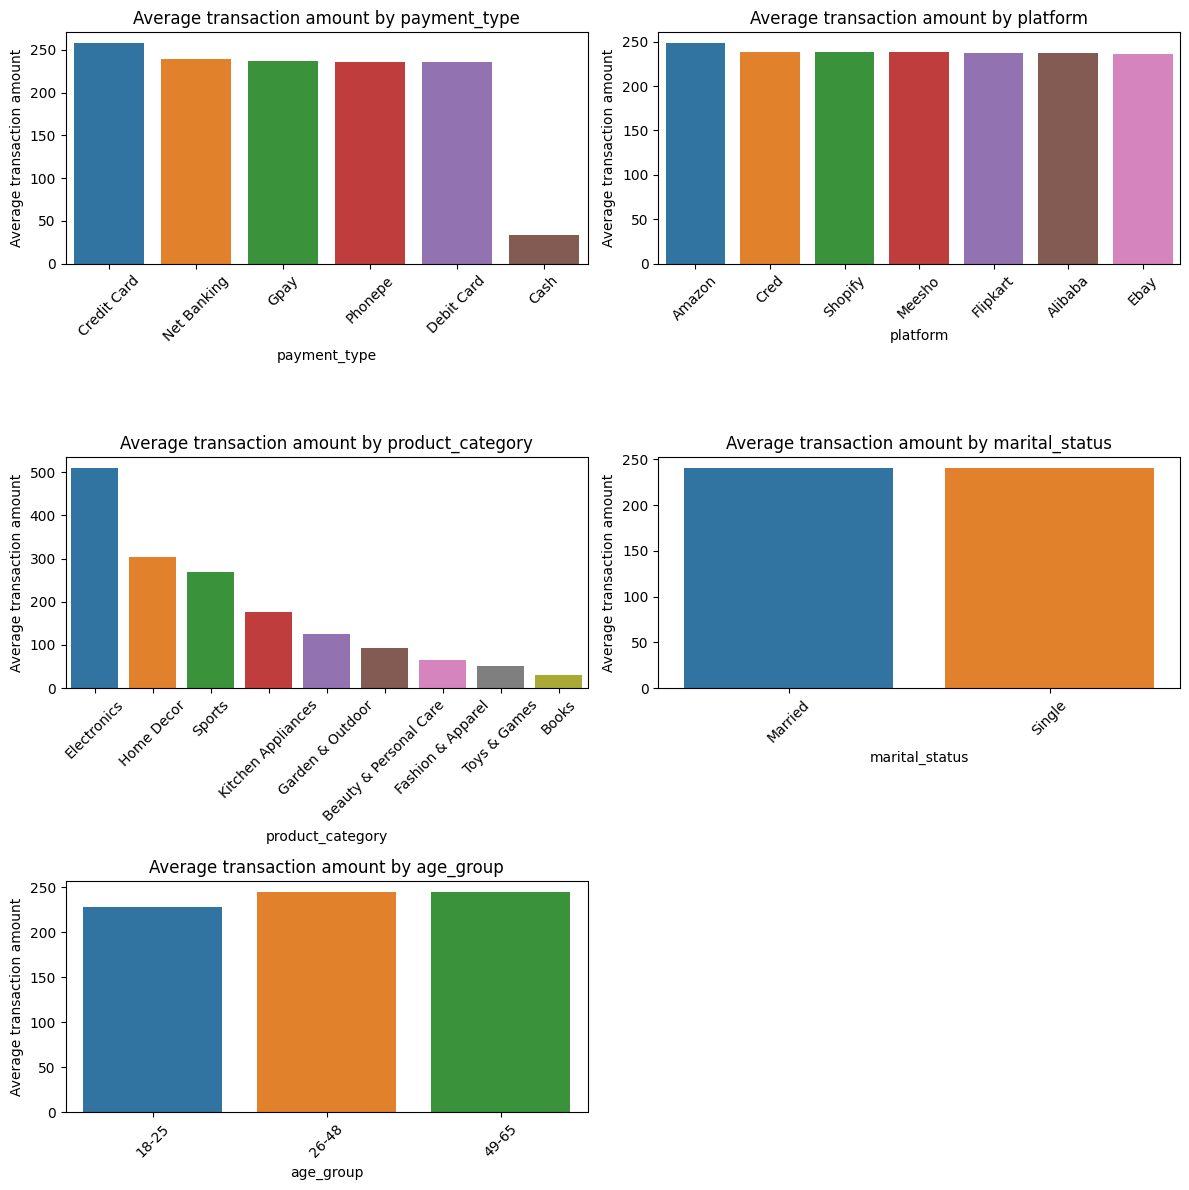

In [84]:
# List of categorical columns
cat_cols = ['payment_type', 'platform', 'product_category', 'marital_status', 'age_group']

num_rows = 3
# Create subplots
fig, axes = plt.subplots(num_rows, 2, figsize=(12, 4 * num_rows))

# Flatten the axes array to make it easier to iterate
axes = axes.flatten()

# Create subplots for each categorical column
for i, cat_col in enumerate(cat_cols):
    # Calculate the average annual income for each category
    avg_tran_amount_by_category = df_merged_2.groupby(cat_col)['tran_amount'].mean().reset_index()
    
    # Sort the data by 'annual_income' before plotting
    sorted_data = avg_tran_amount_by_category.sort_values(by='tran_amount', ascending=False)
    
    sns.barplot(x=cat_col, y='tran_amount', data=sorted_data, ci=None, ax=axes[i], palette='tab10')
    axes[i].set_title(f'Average transaction amount by {cat_col}')
    axes[i].set_xlabel(cat_col)
    axes[i].set_ylabel('Average transaction amount')

    # Rotate x-axis labels for better readability
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)

# Hide any unused subplots
for i in range(len(cat_cols), len(axes)):
    fig.delaxes(axes[i])
plt.tight_layout()
plt.show()

#### Further Analysis On Age Group

Let us do further analysis on age group to figure out their average income, credit limit, credit score etc

In [85]:
# Group the data by age group and calculate the average credit_limit and credit_score
age_group_metrics = df_merged.groupby('age_group')[['annual_income', 'credit_limit', 'credit_score']].mean().reset_index()
age_group_metrics

,age_group,annual_income,credit_limit,credit_score
0,18-25,37091.235772,1130.081301,484.451220
1,26-48,145869.623457,20560.846561,597.569665
2,49-65,260165.925134,41699.197861,701.524064


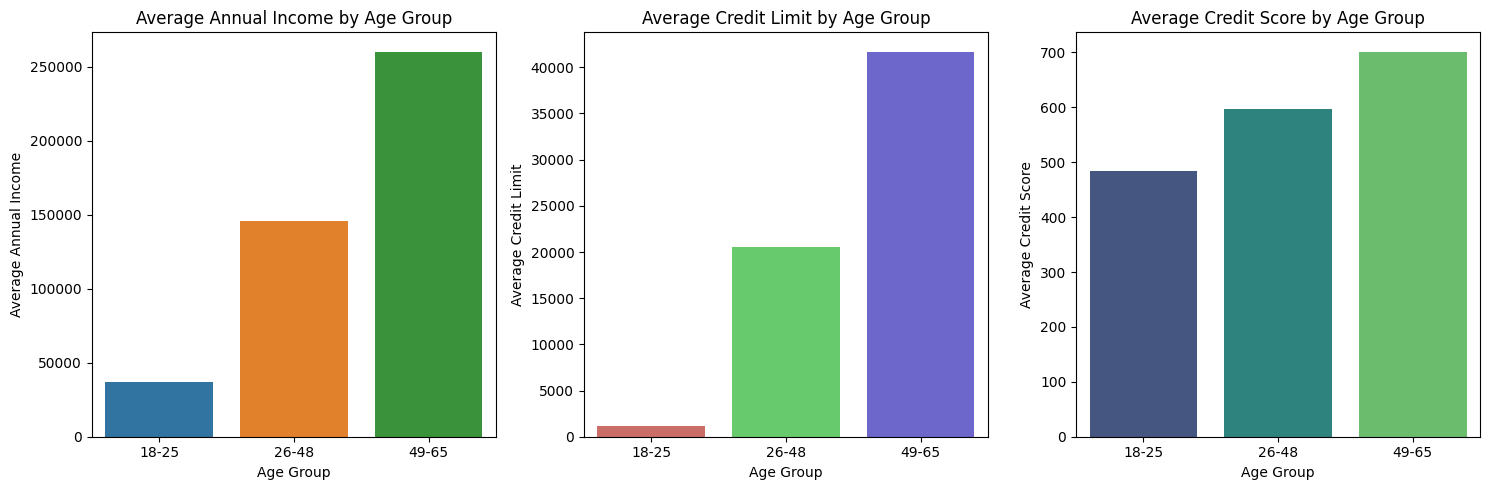

In [86]:
# Create subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

# Plot 1: Average annual income by age group
sns.barplot(x='age_group', y='annual_income', data=age_group_metrics, palette='tab10', ax=ax1)
ax1.set_title('Average Annual Income by Age Group')
ax1.set_xlabel('Age Group')
ax1.set_ylabel('Average Annual Income')
ax1.tick_params(axis='x', rotation=0)

# Plot 2: Average Max Credit Limit by Age Group
sns.barplot(x='age_group', y='credit_limit', data=age_group_metrics, palette='hls', ax=ax2)
ax2.set_title('Average Credit Limit by Age Group')
ax2.set_xlabel('Age Group')
ax2.set_ylabel('Average Credit Limit')
ax2.tick_params(axis='x', rotation=0)

# Plot 3: Average Credit Score by Age Group
sns.barplot(x='age_group', y='credit_score', data=age_group_metrics, palette='viridis', ax=ax3)
ax3.set_title('Average Credit Score by Age Group')
ax3.set_xlabel('Age Group')
ax3.set_ylabel('Average Credit Score')
ax3.tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

## __Finalize Target Market For a Trial Credit Card Launch__

Customers in the 18 to 25 age group make up approximately 26% of the total customer base in the dataset, representing a significant portion of the population being analyzed. Despite their substantial presence, the average annual income for this group remains relatively low, falling under 50,000 dollars. This income level reflects the typical financial stage of younger adults who may still be early in their careers or pursuing education.

Additionally, this younger demographic tends to have limited credit history, which is evident in their lower credit scores and correspondingly lower credit limits. This limited credit profile impacts their borrowing capacity and overall creditworthiness.

Corresponding to their credit profile, the usage of credit cards as a payment method is notably lower in this group compared to older age groups, suggesting either a preference for other payment options or limited access to credit facilities.

When it comes to purchasing behavior, the most popular product categories for customers aged 18 to 25 are Electronics, Fashion & Apparel, and Beauty & Personal Care. These categories align with the lifestyle and consumer preferences typical for younger adults, emphasizing technology, style, and personal grooming.

_____________________________________________________________________________________________________________________________________________________________
## __Phase 2: Trial Run & Hypothesis Testing: Test the credit card offer on a small group before full-scale launch__
_____________________________________________________________________________________________________________________________________________________________

Having determined the target group for the campaign in Phase 1 of the project, we can now proceed to Phase 2, which involves 4 different stages:
- Campaign Design and Planning: Set clear objectives, define the target and control group,campaign duration and outline the campaign strategy.
- Campaign Execution: Implement the campaign
- Campaign Monitoring: Track the campaign's performance in real-time, adjusting strategies as needed.
- Campaign Evaluation, Hypothesis testing, and Decision making: Analyze the results, compare the target and control groups, and assess the overall impact of the campaign.

Before we proceed, these are few insights about our target audience generated from phase 1:
- People with age group of 18 -25 accounts to ~25% of customer base in the data
- Avg annual income of this age group is less than 50k
- They don't have much credit history which is getting reflected in their credit score and max credit limit 
- Usage of credit cards as payment type is relatively low compared to other groups
- Avg transaction amount made with credit cards is also low compared to other groups
- Top 3 most used shopping products categories  : Electronics, Fashion & Apparel, Beauty & Personal care

## __Pre-Campaign Analysis__

Planning a trial run for the new credit card and need to determine the appropriate sample size for A/B testing. This will involve creating both control and test groups. The required number of customers in each group will be based on the statistical power and effect size, which we will finalize in consultation with the business team.

In [89]:
# Set the significance level (alpha), which is the probability of a Type I error (false positive)
alpha = 0.05

# Set the desired statistical power (1 - beta), which is the probability of correctly detecting an effect
power = 0.8

# Set the effect size, which represents the magnitude of the difference you expect to detect
effect_size = 0.2

# Use the statsmodels function to calculate the required sample size per group 
# for a two-sample t-test with the specified effect size, alpha, and power
# ratio=1 indicates equal size for control and test groups
# alternative='two-sided' means we are testing for a difference in either direction
sms.tt_ind_solve_power(
    effect_size=effect_size, 
    alpha=alpha, 
    power=power, 
    ratio=1, 
    alternative='two-sided'
)

393.4056989990351

For effect size 2 we need 393 customers. We have to keep in mind budgeting restrictions while running this campaign hence let us run this for different effect sizes and discuss with business to find out which sample size would be optimal

In [90]:
# Calculate the required sample size for different effect sizes
effect_sizes = [0.1, 0.2, 0.3, 0.4, 0.5,1]  #  standard deviations greater than control group 

for effect_size in effect_sizes:
    sample_size = sms.tt_ind_solve_power(effect_size=effect_size, alpha=alpha, power=power, ratio=1, alternative='two-sided')
    print(f"Effect Size: {effect_size}, Required Sample Size: {int(sample_size)} customers")

Effect Size: 0.1, Required Sample Size: 1570 customers
Effect Size: 0.2, Required Sample Size: 393 customers
Effect Size: 0.3, Required Sample Size: 175 customers
Effect Size: 0.4, Required Sample Size: 99 customers
Effect Size: 0.5, Required Sample Size: 63 customers
Effect Size: 1, Required Sample Size: 16 customers


Based on business requirements, the test should be capable of detecting a minimum 0.4 standard deviation difference between the control and test groups. For the effect size 0.4, we need 100 customers and when we discussed with business, 100 customers is ok in terms of their budgeting constraints for this trail run

#### Formation of Control and Test Groups

1. We identified approximately 246 customers aged 18 to 25. From this group, 100 customers were selected for the initial campaign launch.

2. The campaign was launched for these 100 customers based on the effect size calculation and budget considerations. It will run for a duration of two months.

3. The campaign yielded a conversion rate of approximately 40%, meaning 40 out of the 100 customers in the test group began using the credit card.

4. To maintain consistency in sample size, a control group of 40 customers will be formed. This group will be completely independent of the initial 100 customers used in the test group.

5. As a result, we now have 40 customers each in the control and test groups.


At the end of the 2-month campaign period (from September 10, 2023, to November 10, 2023), we collected daily data capturing the average transaction amounts made by the 40 customers in both the control and test groups. The control group used existing credit cards, while the test group used the newly launched card.

The primary key performance indicator (KPI) for this A/B test is to assess whether the new credit card drives an increase in average transaction amounts.

## __Post-Campaign Analysis: Two Sample Z Test for Our Hypothesis Testing__

#### Hypothesis Formulation
- Null Hypothesis (H0): There is no significant difference in the average spending habit of customers across the age group 18-25 using the new card
- Alternative Hypothesis (H1): There is a significant difference in the average spending habit of customers across the age group 18-25 using the new card

In [92]:
# Import the dataset for average transactions after campaign Phase
df = pd.read_csv(r"C:\Users\antho\OneDrive\Documents\BLACK CONCEPT\MY PERSONAL SPACE\PROJECTS AND COURSES\CODEBASICS\MATHS AND STATS PROJECT\chapter8_assets\datasets\avg_transactions_after_campaign_Phase 2.csv")

In [93]:
# Look at the first few rows of the dataset
df.head()

,campaign_date,control_group_avg_tran,test_group_avg_tran
0,2023-09-10,259.83,277.32
1,2023-09-11,191.27,248.68
2,2023-09-12,212.41,286.61
3,2023-09-13,214.92,214.85
4,2023-09-14,158.55,344.08


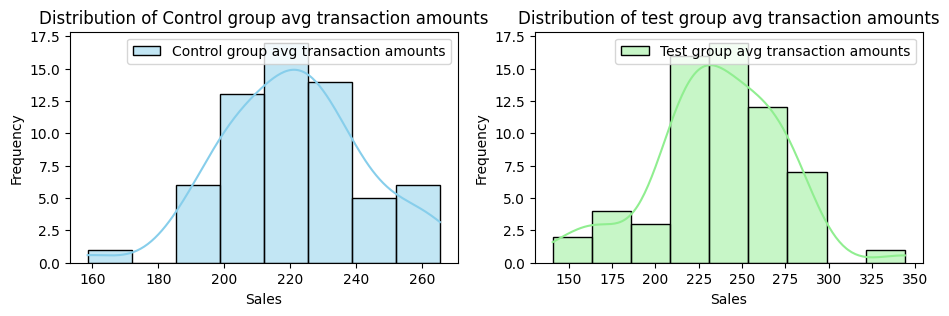

In [94]:
# Let's look at distributions of avg transactions amounts in both groups
# Create a 1x2 grid of subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(11, 3))

# Plot the distribution of Campaign A Sales
sns.histplot(df['control_group_avg_tran'], kde=True, color='skyblue', label='Control group avg transaction amounts', ax=ax1)
ax1.set_xlabel('Sales')
ax1.set_ylabel('Frequency')
ax1.set_title('Distribution of Control group avg transaction amounts')
ax1.legend()

# Plot the distribution of Campaign B Sales
sns.histplot(df['test_group_avg_tran'], kde=True, color='lightgreen', label='Test group avg transaction amounts', ax=ax2)
ax2.set_xlabel('Sales')
ax2.set_ylabel('Frequency')
ax2.set_title('Distribution of test group avg transaction amounts')
ax2.legend()

# Show the plots
plt.show()

#### Perform Hypothesis Testing Using Two Sample Z-test

In [96]:
# Calculate the mean of average transaction amounts for the control group,
# rounded to two decimal places
control_mean = df["control_group_avg_tran"].mean().round(2)

# Calculate the standard deviation of average transaction amounts for the control group,
# also rounded to two decimal places
control_std = df["control_group_avg_tran"].std().round(2)

# Display the mean and standard deviation for quick reference
control_mean, control_std

(np.float64(221.18), np.float64(21.36))

In [97]:
# Calculate the mean of average transaction amounts for the test group,
# rounded to two decimal places
test_mean = df["test_group_avg_tran"].mean().round(2)

# Calculate the standard deviation of average transaction amounts for the test group,
# also rounded to two decimal places
test_std = df["test_group_avg_tran"].std().round(2)

# Display the mean and standard deviation for the test group
test_mean, test_std


(np.float64(235.98), np.float64(36.66))

In [98]:
# Get the total number of observations (rows) in the dataset,
# which represents the sample size for both control and test groups
sample_size = df.shape[0]

# Display the sample size
sample_size

62

#### Test Using Rejection Region (i.e. Critical Z Value)

In [100]:
# Calculate the variance component for the control group, adjusted by sample size
a = (control_std**2 / sample_size)

# Calculate the variance component for the test group, adjusted by sample size
b = (test_std**2 / sample_size)

# Compute the Z-score to compare the means of the test and control groups.
# This assumes both groups are independent and have approximately normal distributions.
Z_score = (test_mean - control_mean) / np.sqrt(a + b)

# Display the Z-score
Z_score

np.float64(2.7466072001806734)

In [101]:
# For a significance level of 5% (0.05) in a right-tailed test, the critical Z-value is approximately 1.645
critical_z_value = st.norm.ppf(1 - alpha)  # Right-tailed test at 5% significance level
critical_z_value

np.float64(1.6448536269514722)

In [ ]:
# Compare the computed Z-score with the critical Z-value
Z_score > critical_z_value

np.True_

Since Z score is higher than critical Z value, we can reject the null hypothesis.

#### Test Using p-Value

In [104]:
# Calculate the p-value corresponding to z score for a right-tailed test
p_value = 1 - st.norm.cdf(Z_score)
p_value

np.float64(0.0030107601919702187)

In [106]:
p_value < alpha # p value is less than significance level of 5% (or 0.05 for absolute value)

np.True_

Since p value is less than significance level (i.e. alpha), we can reject the null hypothesis.

#### Outcome of the test
Since the p-value is less than the significance level (0.05), we reject the null hypothesis. This suggests that there is a statistically significant difference in average transaction amountsbetween the control group and the test group after the campaign.

The company can proceed to launch the credit card.